# Imports

In [478]:
#Imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
plt.style.use("fivethirtyeight")
from sklearn.model_selection import StratifiedKFold #added additional sklearn
from sklearn.neighbors import KNeighborsClassifier #added additional sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder # add this for sklearn
from sklearn.cross_validation import cross_val_score, train_test_split #cross validation
from sklearn.model_selection import train_test_split # train split test 

from sklearn import linear_model, cross_validation #Logistic Regression
from sklearn.cross_validation import cross_val_score #cross validation

from sklearn.tree import DecisionTreeClassifier #Decision Tree

from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, RandomForestClassifier #Random Forest

from sklearn.ensemble import AdaBoostClassifier #AdaBoost


In [479]:
import pandas as pd
df = pd.read_csv("Indiegogoproject.csv")

In [480]:
df.columns

Index([u'bullet_point', u'category', u'category_url', u'clickthrough_url',
       u'close_date', u'currency', u'funds_raised_amount',
       u'funds_raised_percent', u'image_url', u'is_indemand', u'is_pre_launch',
       u'offered_by', u'open_date', u'price_offered', u'price_retail',
       u'product_id', u'product_stage', u'project_id', u'project_type',
       u'source_url', u'tagline', u'title'],
      dtype='object')

In [481]:
df.shape

(20970, 22)

In [236]:
df.head(1)

,bullet_point,category,category_url,clickthrough_url,close_date,currency,funds_raised_amount,funds_raised_percent,image_url,is_indemand,...,open_date,price_offered,price_retail,product_id,product_stage,project_id,project_type,source_url,tagline,title
0,null,Art,/explore/art,/projects/100-campaigns-in-one-help-our-creati...,2013-05-10T23:59:59-07:00,USD,4643,0.21104545454545454,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,...,2013-03-10T14:48:15-07:00,null,null,null,null,248794,campaign,https://www.indiegogo.com/explore/all?project_...,"ONCE upon a time, a photographer needed a subj...",100 CAMPAIGNS IN ONE: Help Our Creative Collec...


In [237]:
df.dtypes

bullet_point            object
category                object
category_url            object
clickthrough_url        object
close_date              object
currency                object
funds_raised_amount     object
funds_raised_percent    object
image_url               object
is_indemand               bool
is_pre_launch           object
offered_by              object
open_date               object
price_offered           object
price_retail            object
product_id              object
product_stage           object
project_id               int64
project_type            object
source_url              object
tagline                 object
title                   object
dtype: object

# Drop multiple columns 6

In [483]:
#df.drop('bullet_point', axis = 1, inplace = True)
#df.drop('price_offered', axis = 1, inplace = True)
#df.drop('price_retail', axis = 1, inplace = True)
df.drop(['bullet_point','category_url', 'clickthrough_url','image_url', 'project_id', 'source_url'], axis = 1, inplace = True)


In [484]:
df.shape

(20970, 16)

In [485]:
#check for nulls everything says non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20970 entries, 0 to 20969
Data columns (total 16 columns):
category                20970 non-null object
close_date              20970 non-null object
currency                20970 non-null object
funds_raised_amount     20970 non-null object
funds_raised_percent    20970 non-null object
is_indemand             20970 non-null bool
is_pre_launch           20970 non-null object
offered_by              20970 non-null object
open_date               20970 non-null object
price_offered           20970 non-null object
price_retail            20970 non-null object
product_id              20970 non-null object
product_stage           20970 non-null object
project_type            20970 non-null object
tagline                 20928 non-null object
title                   20958 non-null object
dtypes: bool(1), object(15)
memory usage: 2.4+ MB


In [197]:
pd.isnull(df)

,category,close_date,currency,funds_raised_amount,funds_raised_percent,is_indemand,is_pre_launch,offered_by,open_date,price_offered,price_retail,product_id,product_stage,project_type,source_url,tagline,title
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [201]:
df[pd.isnull(df).any(axis=1)]

,category,close_date,currency,funds_raised_amount,funds_raised_percent,is_indemand,is_pre_launch,offered_by,open_date,price_offered,price_retail,product_id,product_stage,project_type,source_url,tagline,title
64,Art,2011-11-27T23:59:00-08:00,USD,2100,0.14,False,null,null,2011-07-30T08:36:23-07:00,null,null,null,null,campaign,https://www.indiegogo.com/explore/all?project_...,NaN,NaN
91,Art,2012-08-07T23:59:59-07:00,USD,940,1.88,False,null,null,2012-07-26T14:03:03-07:00,null,null,null,null,campaign,https://www.indiegogo.com/explore/all?project_...,NaN,GRC 2012-2013
1376,Dance & Theater,2012-08-14T23:59:59-07:00,USD,18600,0.93,False,null,null,2012-06-30T20:00:01-07:00,null,null,null,null,campaign,https://www.indiegogo.com/explore/all?project_...,NaN,NaN
1679,Dance & Theater,2012-06-03T23:59:59-07:00,USD,2200,0.22,False,null,null,2012-05-04T11:57:42-07:00,null,null,null,null,campaign,https://www.indiegogo.com/explore/all?project_...,NaN,Onassis. World Premier At The Stella Adler The...
2312,Comics,2013-02-28T23:59:59-08:00,USD,320,0.10666666666666667,False,null,null,2013-01-13T13:38:44-08:00,null,null,null,null,campaign,https://www.indiegogo.com/explore/all?project_...,NaN,The Forgotten Land Fantasy Novel
2415,Comics,2014-07-13T23:59:59-07:00,USD,2,4.0E-4,False,null,null,2014-06-03T09:32:31-07:00,null,null,null,null,campaign,https://www.indiegogo.com/explore/all?project_...,NaN,Comics book from Sheikh Nazim sohbet stories. ...
2995,Photography,2013-07-05T23:59:59-07:00,USD,5005,1.001,False,null,null,2013-05-06T09:23:17-07:00,null,null,null,null,campaign,https://www.indiegogo.com/explore/all?project_...,NaN,NaN
3005,Photography,2013-11-22T23:59:59-08:00,USD,20,0.006666666666666667,False,null,null,2013-10-03T11:38:42-07:00,null,null,null,null,campaign,https://www.indiegogo.com/explore/all?project_...,NaN,Hostice
3113,Photography,2011-07-04T23:59:00-07:00,USD,870,0.2845927379784102,False,null,null,2011-05-05T16:31:14-07:00,null,null,null,null,campaign,https://www.indiegogo.com/explore/all?project_...,NaN,"If you dig my photos, buy a print or photoshoo..."
3174,Photography,2013-10-02T23:59:59-07:00,USD,75,0.001,False,null,null,2013-09-02T16:20:57-07:00,null,null,null,null,campaign,https://www.indiegogo.com/explore/all?project_...,NaN,Snapizzi


In [486]:
df.dropna()

,category,close_date,currency,funds_raised_amount,funds_raised_percent,is_indemand,is_pre_launch,offered_by,open_date,price_offered,price_retail,product_id,product_stage,project_type,tagline,title
0,Art,2013-05-10T23:59:59-07:00,USD,4643,0.21104545454545454,False,null,null,2013-03-10T14:48:15-07:00,null,null,null,null,campaign,"ONCE upon a time, a photographer needed a subj...",100 CAMPAIGNS IN ONE: Help Our Creative Collec...
1,Art,2013-08-08T23:59:59-07:00,USD,1801,1.0005555555555556,False,null,null,2013-07-22T16:56:59-07:00,null,null,null,null,campaign,The Giant Cock Car is an artistic vehicle buil...,"The Giant Cock Car, our favorite Chicken"
2,Art,2013-10-26T23:59:59-07:00,USD,3020,0.26260869565217393,False,null,null,2013-10-01T14:15:57-07:00,null,null,null,null,campaign,30 Poems Written by Stephanie Pruitt -- in 30 ...,30x30x30
3,Art,2014-10-16T23:59:59-07:00,USD,35711,8.92775,False,null,null,2014-09-16T06:54:31-07:00,null,null,null,null,campaign,babes with vegetables raising money to buy an ...,Farmer Tans Calendar Printing
4,Art,2013-03-01T23:59:59-08:00,USD,3100,1.0333333333333334,False,null,null,2013-01-31T00:03:01-08:00,null,null,null,null,campaign,Seeking funding to do my first 2 solo gallery ...,Solo Gallery Shows - Bear Dancer Studios
5,Art,2014-02-16T23:59:59-08:00,USD,5500,0.55,False,null,null,2014-01-03T16:27:27-08:00,null,null,null,null,campaign,Creating a space for multi-disciplinary artist...,BUNKER Projects Artist Residency & Gallery Space
6,Art,2018-03-09T23:59:59-08:00,CAD,806,0.7863414634146342,False,false,null,2018-02-07T20:07:42-08:00,null,null,null,null,campaign,$25 Art Prints to Pay Deposit,Iceland Artist Residency Deposit
7,Art,2013-08-16T23:59:59-07:00,USD,3998,0.32385581206966385,False,null,null,2013-06-17T10:37:24-07:00,null,null,null,null,campaign,"""The Sunshrine"" memorial portal art installati...",The Infinite Portal for Sunshine
8,Art,2013-07-15T23:59:59-07:00,USD,2910,1.0034482758620689,False,null,null,2013-06-26T17:28:01-07:00,null,null,null,null,campaign,Help bring the spirit of 2115 Taft to the hall...,TRANSPLANT: An art show honoring 2115 Taft
9,Art,2014-01-17T23:59:59-08:00,USD,3955,0.0791,False,null,null,2013-11-29T09:42:04-08:00,null,null,null,null,campaign,Design meets social innovation. For every pro...,A start-up Design firm that continually gives ...


In [487]:
df.shape

(20970, 16)

In [243]:
df.dropna().shape

(20927, 17)

In [60]:
#df.dropna(axis=1, how='all', inplace = True)


In [61]:
#df.dropna(axis=1, how='any',inplace = True)

In [62]:
#df.fillna(0, inplace=True)

In [244]:
df.dtypes

category                object
close_date              object
currency                object
funds_raised_amount     object
funds_raised_percent    object
is_indemand               bool
is_pre_launch           object
offered_by              object
open_date               object
price_offered           object
price_retail            object
product_id              object
product_stage           object
project_type            object
source_url              object
tagline                 object
title                   object
dtype: object

# convert data type from objects to float

In [488]:
#convert funds_raised_percent into float from object datatype, which doesn't let filtering. Floats can filter 
df["funds_raised_percent"] = df.funds_raised_percent.convert_objects(convert_numeric=True)

/Users/kimkxle/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [489]:
df["funds_raised_amount"] = df.funds_raised_amount.convert_objects(convert_numeric=True)

/Users/kimkxle/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [205]:
#df["category"] = pd.to_numeric(df['category'])

In [206]:
#pd.to_numeric(df['category'],errors='ignore').astype(int)

In [490]:
df.dtypes

category                 object
close_date               object
currency                 object
funds_raised_amount     float64
funds_raised_percent    float64
is_indemand                bool
is_pre_launch            object
offered_by               object
open_date                object
price_offered            object
price_retail             object
product_id               object
product_stage            object
project_type             object
tagline                  object
title                    object
dtype: object

# sum all the null values in close date - this retitles nulls as nulls
#sum(df["close_date"]== "null")
#sum(df["open_date"]== "null")

# drop nulls in close date and open date , default is axis = 0 so no need to enter. axis = 0 is for rows


In [248]:
#nonetype has no objects that are null
#df.dropna(subset=["close_date", "open_date"], inplace=True)

# convert object to date time 

In [491]:
#drop nulls from close date 

ni = df[df['close_date'] == 'null'].index.tolist()
df.drop(ni, inplace=True)


ni = df[df['open_date'] == 'null'].index.tolist()
df.drop(ni, inplace=True)



#to see unique number of nulls in a column

df.close_date.isnull().sum()
df.open_date.isnull().sum()

0

In [492]:
df["close_date_dt"] = pd.to_datetime(df.close_date)

#you can over ride by using the same name and remove the _dt at the end

In [493]:
df["open_date_dt"] = pd.to_datetime(df.open_date)

In [494]:
df.dtypes

category                        object
close_date                      object
currency                        object
funds_raised_amount            float64
funds_raised_percent           float64
is_indemand                       bool
is_pre_launch                   object
offered_by                      object
open_date                       object
price_offered                   object
price_retail                    object
product_id                      object
product_stage                   object
project_type                    object
tagline                         object
title                           object
close_date_dt           datetime64[ns]
open_date_dt            datetime64[ns]
dtype: object

In [150]:
#df[df['close_date'] == 'null'].index

Int64Index([ 1960,  4545,  4726,  4810,  5086,  6094,  7646,  7647,  8309,
             8802,
            ...
            20960, 20961, 20962, 20963, 20964, 20965, 20966, 20967, 20968,
            20969],
           dtype='int64', length=249)

In [73]:
df.round({'funds_raised_percent': 2})
#df.round(2)
#df['funds_raised_percent']

,bullet_point,category,category_url,clickthrough_url,close_date,currency,funds_raised_amount,funds_raised_percent,image_url,is_indemand,...,price_offered,price_retail,product_id,product_stage,project_id,project_type,source_url,tagline,title,int_category
0,null,Art,/explore/art,/projects/100-campaigns-in-one-help-our-creati...,2013-05-10T23:59:59-07:00,USD,4643.0,0.21,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,...,null,null,null,null,248794,campaign,https://www.indiegogo.com/explore/all?project_...,"ONCE upon a time, a photographer needed a subj...",100 CAMPAIGNS IN ONE: Help Our Creative Collec...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,null,Art,/explore/art,/projects/the-giant-cock-car-our-favorite-chic...,2013-08-08T23:59:59-07:00,USD,1801.0,1.00,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,...,null,null,null,null,472439,campaign,https://www.indiegogo.com/explore/all?project_...,The Giant Cock Car is an artistic vehicle buil...,"The Giant Cock Car, our favorite Chicken","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,null,Art,/explore/art,/projects/30x30x30,2013-10-26T23:59:59-07:00,USD,3020.0,0.26,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,...,null,null,null,null,513287,campaign,https://www.indiegogo.com/explore/all?project_...,30 Poems Written by Stephanie Pruitt -- in 30 ...,30x30x30,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,null,Art,/explore/art,/projects/farmer-tans-calendar-printing,2014-10-16T23:59:59-07:00,USD,35711.0,8.93,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,...,null,null,null,null,866783,campaign,https://www.indiegogo.com/explore/all?project_...,babes with vegetables raising money to buy an ...,Farmer Tans Calendar Printing,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,null,Art,/explore/art,/projects/solo-gallery-shows-bear-dancer-studios,2013-03-01T23:59:59-08:00,USD,3100.0,1.03,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,...,null,null,null,null,325793,campaign,https://www.indiegogo.com/explore/all?project_...,Seeking funding to do my first 2 solo gallery ...,Solo Gallery Shows - Bear Dancer Studios,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,null,Art,/explore/art,/projects/bunker-projects-artist-residency-gal...,2014-02-16T23:59:59-08:00,USD,5500.0,0.55,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,...,null,null,null,null,618504,campaign,https://www.indiegogo.com/explore/all?project_...,Creating a space for multi-disciplinary artist...,BUNKER Projects Artist Residency & Gallery Space,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,null,Art,/explore/art,/projects/iceland-artist-residency-deposit-art,2018-03-09T23:59:59-08:00,CAD,806.0,0.79,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,...,null,null,null,null,2336824,campaign,https://www.indiegogo.com/explore/all?project_...,$25 Art Prints to Pay Deposit,Iceland Artist Residency Deposit,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,null,Art,/explore/art,/projects/the-infinite-portal-for-sunshine,2013-08-16T23:59:59-07:00,USD,3998.0,0.32,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,...,null,null,null,null,435725,campaign,https://www.indiegogo.com/explore/all?project_...,"""The Sunshrine"" memorial portal art installati...",The Infinite Portal for Sunshine,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,null,Art,/explore/art,/projects/transplant-an-art-show-honoring-2115...,2013-07-15T23:59:59-07:00,USD,2910.0,1.00,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,...,null,null,null,null,449150,campaign,https://www.indiegogo.com/explore/all?project_...,Help bring the spirit of 2115 Taft to the hall...,TRANSPLANT: An art show honoring 2115 Taft,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9,null,Art,/explore/art,/projects/a-start-up-design-firm-that-continua...,2014-01-17T23:59:59-08:00,USD,3955.0,0.08,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,...,null,null,null,null,556754,c

In [277]:
df[(df.funds_raised_percent>1)]

,category,close_date,currency,funds_raised_amount,funds_raised_percent,is_indemand,is_pre_launch,offered_by,open_date,price_offered,price_retail,product_id,product_stage,project_type,source_url,tagline,title,open_date_dt,close_date_dt,Metgoal
1,Art,2013-08-08T23:59:59-07:00,USD,1801.0,1.000556,False,null,null,2013-07-22T16:56:59-07:00,null,null,null,null,campaign,https://www.indiegogo.com/explore/all?project_...,The Giant Cock Car is an artistic vehicle buil...,"The Giant Cock Car, our favorite Chicken",2013-07-22 23:56:59,2013-08-09 06:59:59,True
3,Art,2014-10-16T23:59:59-07:00,USD,35711.0,8.927750,False,null,null,2014-09-16T06:54:31-07:00,null,null,null,null,campaign,https://www.indiegogo.com/explore/all?project_...,babes with vegetables raising money to buy an ...,Farmer Tans Calendar Printing,2014-09-16 13:54:31,2014-10-17 06:59:59,True
4,Art,2013-03-01T23:59:59-08:00,USD,3100.0,1.033333,False,null,null,2013-01-31T00:03:01-08:00,null,null,null,null,campaign,https://www.indiegogo.com/explore/all?project_...,Seeking funding to do my first 2 solo gallery ...,Solo Gallery Shows - Bear Dancer Studios,2013-01-31 08:03:01,2013-03-02 07:59:59,True
8,Art,2013-07-15T23:59:59-07:00,USD,2910.0,1.003448,False,null,null,2013-06-26T17:28:01-07:00,null,null,null,null,campaign,https://www.indiegogo.com/explore/all?project_...,Help bring the spirit of 2115 Taft to the hall...,TRANSPLANT: An art show honoring 2115 Taft,2013-06-27 00:28:01,2013-07-16 06:59:59,True
11,Art,2013-04-25T23:59:59-07:00,GBP,769.0,1.281667,False,null,null,2013-04-05T09:23:09-07:00,null,null,null,null,campaign,https://www.indiegogo.com/explore/all?project_...,Illustrator Jack Hudson teams up with 3D duo L...,Lord Whitney and Jack Hudson present 'Mock n R...,2013-04-05 16:23:09,2013-04-26 06:59:59,True
13,Art,2013-06-07T23:59:59-07:00,USD,2649.0,1.059600,False,null,null,2013-05-15T00:19:22-07:00,null,null,null,null,campaign,https://www.indiegogo.com/explore/all?project_...,Raising funds to build the Throne of Visions a...,THRONE OF VISIONS,2013-05-15 07:19:22,2013-06-08 06:59:59,True
14,Art,2013-05-10T23:59:59-07:00,EUR,3506.0,1.168667,False,null,null,2013-03-30T02:28:25-07:00,null,null,null,null,campaign,https://www.indiegogo.com/explore/all?project_...,Per celebrare il decimo anniversario del Novar...,Novara Jazz: dieci anni di immagini,2013-03-30 09:28:25,2013-05-11 06:59:59,True
16,Art,2013-10-11T23:59:59-07:00,CAD,18751.0,1.041722,False,null,null,2013-08-24T02:11:10-07:00,null,null,null,null,campaign,https://www.indiegogo.com/explore/all?project_...,Past Campaign,Past Campaign,2013-08-24 09:11:10,2013-10-12 06:59:59,True
17,Art,2013-09-28T23:59:59-07:00,CAD,5120.0,1.024000,False,null,null,2013-08-19T14:15:09-07:00,null,null,null,null,campaign,https://www.indiegogo.com/explore/all?project_...,"Support Stages, a Canadian dance production of...",Stages,2013-08-19 21:15:09,2013-09-29 06:59:59,True
19,Art,2013-10-26T23:59:59-07:00,USD,11377.0,1.137700,False,null,null,2013-09-11T11:08:25-07:00,null,null,null,null,campaign,https://www.indiegogo.com/explore/all?project_...,"Help restore this Balmy Alley mural, ""Culture ...",Save This Historic San Francisco Mural,2013-09-11 18:08:25,2013-10-27 06:59:59,True


# count by category

In [495]:
df.groupby('category').category.count().sort_values(ascending=False)

category
Writing & Publishing       840
Phones & Accessories       840
Art                        840
Comics                     840
Dance & Theater            840
Education                  840
Environment                840
Film                       840
Local Businesses           840
Music                      840
Home                       840
Animal Rights              840
Productivity               840
Video Games                840
Fashion & Wearables        839
Travel & Outdoors          839
Photography                839
Health & Fitness           839
Transportation             822
Food & Beverages           805
Human Rights               759
Web Series & TV Shows      721
Audio                      509
Camera Gear                459
Wellness                   393
Culture                    352
Energy & Green Tech        303
Tabletop Games             276
Podcasts, Blogs & Vlogs    114
Spirituality                92
Name: category, dtype: int64

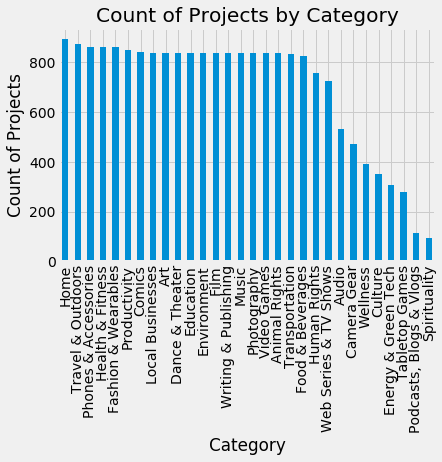

In [35]:
df.groupby('category').category.count().sort_values(ascending=False).plot(kind='bar')

plt.title("Count of Projects by Category")
plt.xlabel("Category")
plt.ylabel("Count of Projects")
plt.show( )


In [36]:
df.groupby('category').funds_raised_percent.count().sort_values(ascending=False)

category
Home                       894
Travel & Outdoors          875
Phones & Accessories       864
Health & Fitness           863
Fashion & Wearables        861
Productivity               849
Comics                     841
Local Businesses           840
Art                        840
Dance & Theater            840
Education                  840
Environment                840
Film                       840
Writing & Publishing       840
Music                      840
Photography                840
Video Games                840
Animal Rights              840
Transportation             835
Food & Beverages           825
Human Rights               759
Web Series & TV Shows      725
Audio                      531
Camera Gear                470
Wellness                   393
Culture                    352
Energy & Green Tech        309
Tabletop Games             278
Podcasts, Blogs & Vlogs    114
Spirituality                92
Name: funds_raised_percent, dtype: int64

In [107]:
df.groupby('category').funds_raised_amount.agg(['count','min','max','median','mean'])

,count,min,max,median,mean
category,,,,,
Animal Rights,840,0.0,115126.0,1086.0,2836.773810
Art,840,2.0,777871.0,1647.5,5462.880952
Audio,511,0.0,3429046.0,4797.0,136789.412916
Camera Gear,461,0.0,3317655.0,1040.0,67370.921909
Comics,840,0.0,124040.0,633.0,2327.158333
Culture,352,0.0,286087.0,708.5,5402.139205
Dance & Theater,840,0.0,51636.0,2081.5,3767.517857
Education,840,0.0,163534.0,2095.0,5566.117857
Energy & Green Tech,307,0.0,13288449.0,364.0,94893.032573


# Create column to track Output Classifer ( Metgoal by Fund Raised  > 100% or Not )

In [496]:

df['Metgoal'] = df.funds_raised_percent.apply(lambda funds_raised_percent: (funds_raised_percent > 1))
df
                                             
                                        

,category,close_date,currency,funds_raised_amount,funds_raised_percent,is_indemand,is_pre_launch,offered_by,open_date,price_offered,price_retail,product_id,product_stage,project_type,tagline,title,close_date_dt,open_date_dt,Metgoal
0,Art,2013-05-10T23:59:59-07:00,USD,4643.0,0.211045,False,null,null,2013-03-10T14:48:15-07:00,null,null,null,null,campaign,"ONCE upon a time, a photographer needed a subj...",100 CAMPAIGNS IN ONE: Help Our Creative Collec...,2013-05-11 06:59:59,2013-03-10 21:48:15,False
1,Art,2013-08-08T23:59:59-07:00,USD,1801.0,1.000556,False,null,null,2013-07-22T16:56:59-07:00,null,null,null,null,campaign,The Giant Cock Car is an artistic vehicle buil...,"The Giant Cock Car, our favorite Chicken",2013-08-09 06:59:59,2013-07-22 23:56:59,True
2,Art,2013-10-26T23:59:59-07:00,USD,3020.0,0.262609,False,null,null,2013-10-01T14:15:57-07:00,null,null,null,null,campaign,30 Poems Written by Stephanie Pruitt -- in 30 ...,30x30x30,2013-10-27 06:59:59,2013-10-01 21:15:57,False
3,Art,2014-10-16T23:59:59-07:00,USD,35711.0,8.927750,False,null,null,2014-09-16T06:54:31-07:00,null,null,null,null,campaign,babes with vegetables raising money to buy an ...,Farmer Tans Calendar Printing,2014-10-17 06:59:59,2014-09-16 13:54:31,True
4,Art,2013-03-01T23:59:59-08:00,USD,3100.0,1.033333,False,null,null,2013-01-31T00:03:01-08:00,null,null,null,null,campaign,Seeking funding to do my first 2 solo gallery ...,Solo Gallery Shows - Bear Dancer Studios,2013-03-02 07:59:59,2013-01-31 08:03:01,True
5,Art,2014-02-16T23:59:59-08:00,USD,5500.0,0.550000,False,null,null,2014-01-03T16:27:27-08:00,null,null,null,null,campaign,Creating a space for multi-disciplinary artist...,BUNKER Projects Artist Residency & Gallery Space,2014-02-17 07:59:59,2014-01-04 00:27:27,False
6,Art,2018-03-09T23:59:59-08:00,CAD,806.0,0.786341,False,false,null,2018-02-07T20:07:42-08:00,null,null,null,null,campaign,$25 Art Prints to Pay Deposit,Iceland Artist Residency Deposit,2018-03-10 07:59:59,2018-02-08 04:07:42,False
7,Art,2013-08-16T23:59:59-07:00,USD,3998.0,0.323856,False,null,null,2013-06-17T10:37:24-07:00,null,null,null,null,campaign,"""The Sunshrine"" memorial portal art installati...",The Infinite Portal for Sunshine,2013-08-17 06:59:59,2013-06-17 17:37:24,False
8,Art,2013-07-15T23:59:59-07:00,USD,2910.0,1.003448,False,null,null,2013-06-26T17:28:01-07:00,null,null,null,null,campaign,Help bring the spirit of 2115 Taft to the hall...,TRANSPLANT: An art show honoring 2115 Taft,2013-07-16 06:59:59,2013-06-27 00:28:01,True
9,Art,2014-01-17T23:59:59-08:00,USD,3955.0,0.079100,False,null,null,2013-11-29T09:42:04-08:00,null,null,null,null,campaign,Design meets social innovation. For every pro...,A start-up Design firm that continually gives ...,2014-01-18 07:59:59,2013-11-29 17:42:04,False


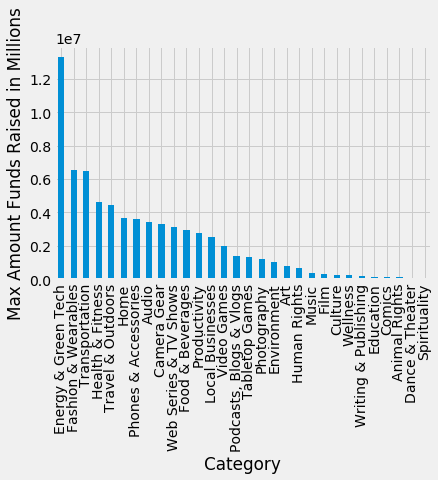

In [59]:
df.groupby('category')['funds_raised_amount'].max().sort_values(ascending=False).plot(kind='bar')

#plt.title("Max Amount Funded by Project Category")
plt.xlabel("Category")
plt.ylabel("Max Amount Funds Raised in Millions")
plt.show( )


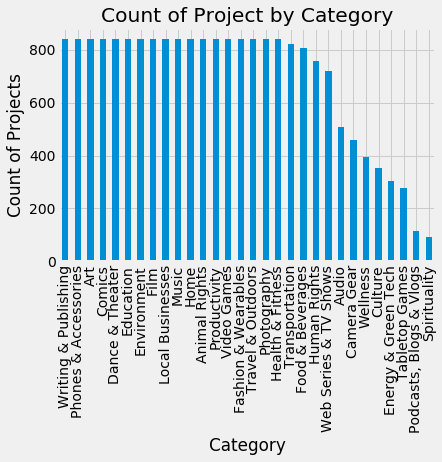

In [60]:
df.groupby('category').category.count().sort_values(ascending=False).plot(kind='bar')

plt.title("Count of Project by Category")
plt.xlabel("Category")
plt.ylabel("Count of Projects")
plt.show( )


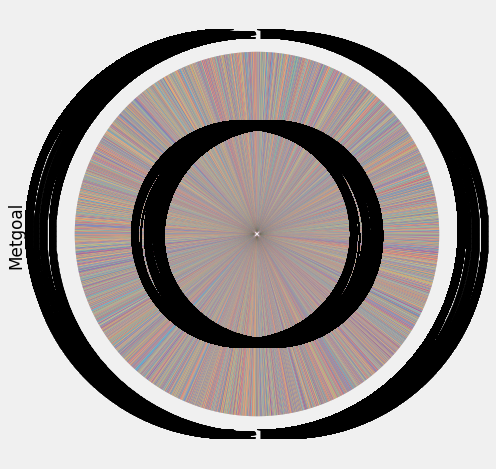

In [76]:
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
df.plot(kind='pie', y = 'Category', ax=ax1, autopct='%1.1f%%',
 startangle=90, shadow=False, labels=df['Category'], legend = False, fontsize=14)


In [275]:
df.groupby(['Metgoal']).Metgoal.count().sort_values(ascending=False)


Metgoal
False    15192
True      5529
Name: Metgoal, dtype: int64

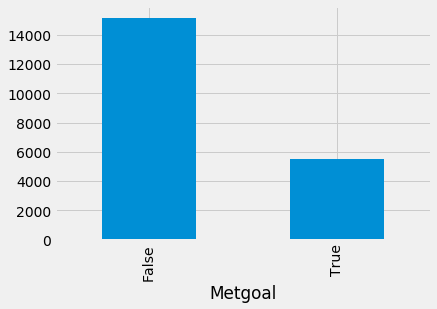

In [276]:
df.groupby(['Metgoal']).Metgoal.count().sort_values(ascending=False).plot(kind='bar')



In [184]:
#df.groupby(['category', 'Metgoal'])['category'].count().sort_values(ascending=False)

Met =df.groupby(['category','Metgoal'])['Metgoal'].count().sort_values(ascending=False)
Met.unstack()

Metgoal,False,True
category,,
Animal Rights,633,207
Art,577,263
Audio,292,239
Camera Gear,328,142
Comics,623,218
Culture,292,60
Dance & Theater,568,272
Education,628,212
Energy & Green Tech,252,57


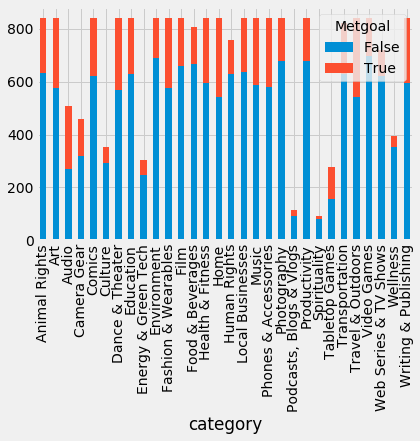

In [250]:
Met =df.groupby(['category','Metgoal'])['Metgoal'].count().sort_values(ascending=False)
Met.unstack().plot.bar(stacked=True)

In [497]:
Met=df[df.funds_raised_percent >1].category.sort_values(ascending=False)
Met           

6960     Writing & Publishing
7312     Writing & Publishing
7323     Writing & Publishing
7326     Writing & Publishing
7329     Writing & Publishing
7330     Writing & Publishing
7346     Writing & Publishing
7099     Writing & Publishing
7097     Writing & Publishing
7095     Writing & Publishing
7091     Writing & Publishing
7090     Writing & Publishing
7087     Writing & Publishing
7086     Writing & Publishing
7085     Writing & Publishing
7081     Writing & Publishing
7072     Writing & Publishing
7068     Writing & Publishing
7065     Writing & Publishing
7062     Writing & Publishing
7347     Writing & Publishing
7350     Writing & Publishing
7355     Writing & Publishing
7193     Writing & Publishing
7192     Writing & Publishing
7190     Writing & Publishing
7182     Writing & Publishing
7180     Writing & Publishing
7179     Writing & Publishing
7315     Writing & Publishing
                 ...         
14164           Animal Rights
14157           Animal Rights
14154     

In [498]:
Mettrue = df.loc[df.funds_raised_percent >1,'category'].count()

In [280]:
#mean_fare2 = df.groupby(['category','df.funds_raised_percent >1'])['Mettrue'].count()
#mean_fare2

#mean_fare2.unstack().plot(kind='bar')
#plt.show()

#mean_fare2.unstack().plot(kind='bar', stacked=True)
#plt.show()

#mean_raised= df.groupby(['Metgoal','category'])['funds_raised_amount'].mean()


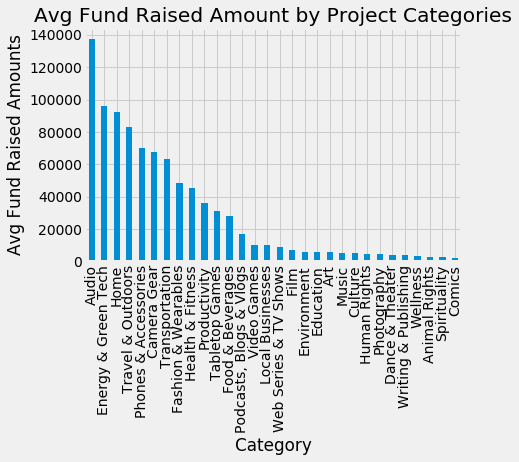

In [499]:
df.groupby(['category']).funds_raised_amount.mean().sort_values(ascending=False).plot(kind='bar')

plt.title("Avg Fund Raised Amount by Project Categories")
plt.xlabel("Category")
plt.ylabel("Avg Fund Raised Amounts")
plt.show( )


# Distribution Plot

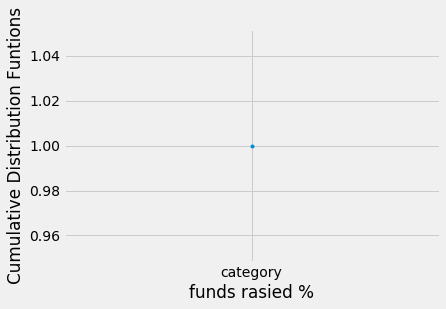

In [281]:
x = np.sort(['category'])
y = np.arange(1, len(x)+1)/len(x)
_ = plt.plot(x, y, marker = '.', linestyle='none')
_ = plt.xlabel('funds rasied %')
_ = plt.ylabel('Cumulative Distribution Funtions')
plt.margins(0.02) #keeps data off plot edges
plt.show()

NameError: name 'py' is not defined

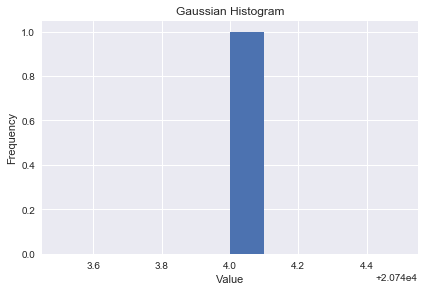

In [30]:
Distribution_chart = df.funds_raised_amount.count()
plt.hist(Distribution_chart)
plt.title("Gaussian Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

fig = plt.gcf()

plot_url = py.plot_mpl(fig, filename='mpl-basic-histogram')

In [282]:
df.describe()

,funds_raised_amount,funds_raised_percent
count,2.072100e+04,2.072100e+04
mean,2.889808e+04,7.275806e+01
std,2.088191e+05,8.276767e+03
min,0.000000e+00,0.000000e+00
25%,2.870000e+02,3.000000e-02
50%,1.250000e+03,2.229667e-01
75%,4.750000e+03,1.002000e+00
max,1.328845e+07,1.164458e+06


# normal distribution

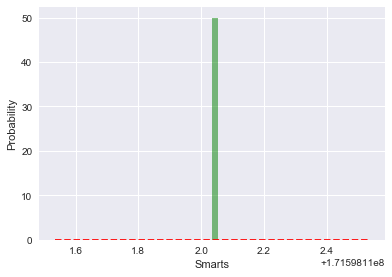

In [40]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


fig = plt.figure()

# example data
mu = df.funds_raised_percent.mean() # mean of distribution
sigma = df.funds_raised_percent.std() # standard deviation of distribution
x = mu + sigma * df.funds_raised_percent.count()

num_bins = 50
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='green', alpha=0.5)
# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Smarts')
plt.ylabel('Probability')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)



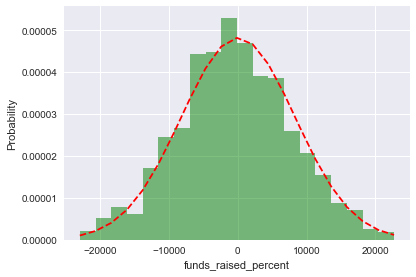

In [52]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


fig = plt.figure()

# example data
mu = df.funds_raised_percent.mean() # mean of distribution
sigma = df.funds_raised_percent.std() # standard deviation of distribution
x = mu + sigma * np.random.randn(1000)

num_bins = 20
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='green', alpha=0.5)
# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('funds_raised_percent')
plt.ylabel('Probability')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)


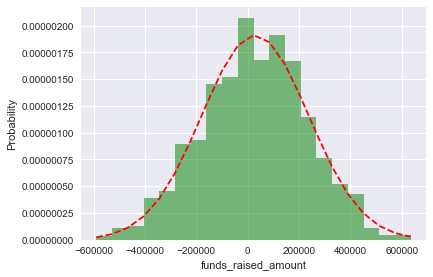

In [54]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


fig = plt.figure()

# example data
mu = df.funds_raised_amount.mean() # mean of distribution
sigma = df.funds_raised_amount.std() # standard deviation of distribution
x = mu + sigma * np.random.randn(1000)

num_bins = 20
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='green', alpha=0.5)
# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('funds_raised_amount')
plt.ylabel('Probability')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)


ValueError: max must be larger than min in range parameter.

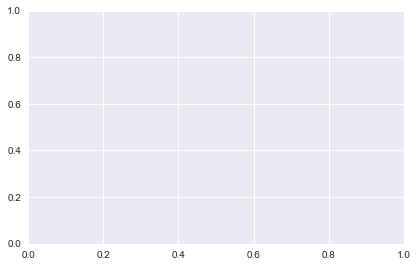

In [16]:
#import seaborn as sns
#sns.set()
_ = plt.hist(df[('funds_raised_amount')])
_ = plt.xlabel('funds rasied %')
_ = plt.ylabel('count')
plt.show()

# Optional pick 6 out of 22 attributes to work with



In [19]:
#create the 5 subset of attributes to work with
#subset = ['category', 'funds_raised_amount', 'funds_raised_percent', 'is_indemand', 'is_pre_launch', 'product_stage', 'tagline']
#df.set_index('category')

subset = ['category','funds_raised_amount', 'funds_raised_percent', 'close_date_dt', 'open_date_dt', 'Metgoal']

df2 = df[subset].copy()

df2.columns

KeyError: "['close_date_dt' 'open_date_dt' 'Metgoal'] not in index"

In [21]:
df2.dtypes

category                        object
funds_raised_amount            float64
funds_raised_percent           float64
close_date_dt           datetime64[ns]
open_date_dt            datetime64[ns]
Metgoal                           bool
dtype: object

# create categories into dummies numeric values for KNN

In [221]:
df_dummies = pd.get_dummies(df, columns=["category"])

In [21]:
df_dummies.category_Art.sum()

840

In [15]:
df_dummies.columns

Index([u'close_date', u'currency', u'funds_raised_amount',
       u'funds_raised_percent', u'is_indemand', u'is_pre_launch',
       u'offered_by', u'open_date', u'price_offered', u'price_retail',
       u'product_id', u'product_stage', u'project_type', u'tagline', u'title',
       u'category_Animal Rights', u'category_Art', u'category_Audio',
       u'category_Camera Gear', u'category_Comics', u'category_Culture',
       u'category_Dance & Theater', u'category_Education',
       u'category_Energy & Green Tech', u'category_Environment',
       u'category_Fashion & Wearables', u'category_Film',
       u'category_Food & Beverages', u'category_Health & Fitness',
       u'category_Home', u'category_Human Rights',
       u'category_Local Businesses', u'category_Music',
       u'category_Phones & Accessories', u'category_Photography',
       u'category_Podcasts, Blogs & Vlogs', u'category_Productivity',
       u'category_Spirituality', u'category_Tabletop Games',
       u'category_Transportat

# convert date time variables in months and years

In [500]:
import datetime
import time

df['close_year'] = df['close_date_dt'].dt.year
df['close_month']= df['close_date_dt'].dt.month
df['open_year'] = df['open_date_dt'].dt.year
df['open_month']= df['open_date_dt'].dt.month

In [78]:
df.head(1)

,bullet_point,category,category_url,clickthrough_url,close_date,currency,funds_raised_amount,funds_raised_percent,image_url,is_indemand,...,source_url,tagline,title,close_date_dt,open_date_dt,Metgoal,close_year,close_month,open_year,open_month
0,null,Art,/explore/art,/projects/100-campaigns-in-one-help-our-creati...,2013-05-10T23:59:59-07:00,USD,4643.0,0.211045,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,...,https://www.indiegogo.com/explore/all?project_...,"ONCE upon a time, a photographer needed a subj...",100 CAMPAIGNS IN ONE: Help Our Creative Collec...,2013-05-11 06:59:59,2013-03-10 21:48:15,False,2013,5,2013,3


# convert date monhts and years into dummies data for predictions

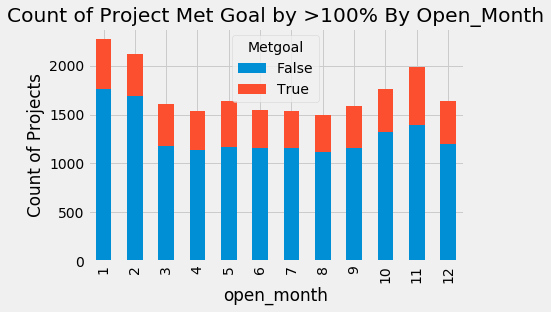

In [251]:
Met_chart = df.groupby(["open_month","Metgoal"])["Metgoal"].count().sort_values(ascending=False)
Met_chart.unstack().plot.bar(stacked=True)

plt.title("Count of Project Met Goal by >100% By Open_Month")
plt.ylabel("Count of Projects")
plt.show( )



In [399]:
Met_chart = df.groupby(["open_month","Metgoal"])["Metgoal"].count().sort_values(ascending=False)
Met_chart.unstack()


Metgoal,False,True
open_month,,
1,1756,515
2,1689,434
3,1175,431
4,1142,393
5,1170,472
6,1159,390
7,1161,372
8,1116,382
9,1156,428


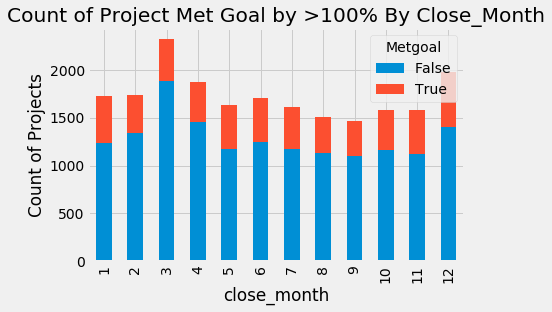

In [252]:
Met_chart2 = df.groupby(["close_month","Metgoal"])["Metgoal"].count().sort_values(ascending=False)
Met_chart2.unstack().plot.bar(stacked=True)

plt.title("Count of Project Met Goal by >100% By Close_Month")
plt.ylabel("Count of Projects")
plt.show( )


In [401]:
Met_chart2 = df.groupby(["close_month","Metgoal"])["Metgoal"].count().sort_values(ascending=False)
Met_chart2.unstack()

Metgoal,False,True
close_month,,
1,1241,482
2,1338,402
3,1884,438
4,1459,418
5,1171,467
6,1244,460
7,1170,444
8,1133,370
9,1104,361


In [501]:
df_dummies = pd.get_dummies(df, columns= ["category", "close_year", "close_month", "open_year", "open_month" ])


In [502]:
df_dummies.columns

Index([u'close_date', u'currency', u'funds_raised_amount',
       u'funds_raised_percent', u'is_indemand', u'is_pre_launch',
       u'offered_by', u'open_date', u'price_offered', u'price_retail',
       u'product_id', u'product_stage', u'project_type', u'tagline', u'title',
       u'close_date_dt', u'open_date_dt', u'Metgoal',
       u'category_Animal Rights', u'category_Art', u'category_Audio',
       u'category_Camera Gear', u'category_Comics', u'category_Culture',
       u'category_Dance & Theater', u'category_Education',
       u'category_Energy & Green Tech', u'category_Environment',
       u'category_Fashion & Wearables', u'category_Film',
       u'category_Food & Beverages', u'category_Health & Fitness',
       u'category_Home', u'category_Human Rights',
       u'category_Local Businesses', u'category_Music',
       u'category_Phones & Accessories', u'category_Photography',
       u'category_Podcasts, Blogs & Vlogs', u'category_Productivity',
       u'category_Spirituality', u'c

# Optional / Not needed  - convert category into numeric 

In [314]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df2["integer_category"] = lb_make.fit_transform(df2["category"])
df2[["category", "integer_category"]].head(10)

NameError: name 'df2' is not defined

In [83]:
df2.dtypes

category                 object
funds_raised_amount     float64
funds_raised_percent    float64
close_date               object
open_date                object
integer_category          int64
dtype: object

In [ ]:
df2.dtypes

In [29]:
str_category = df.category
 
int_lst = [int(object(x)) for x in str_category]
 
print (int_lst)

TypeError: object() takes no parameters

# not needed -  create subset with new integer category for kmeans - it's better to use dummies columns to get the output of the dummies column

In [107]:
df2.iloc[: ,0:2]

,integer_category,category
0,1,Art
1,1,Art
2,1,Art
3,1,Art
4,1,Art
5,1,Art
6,1,Art
7,1,Art
8,1,Art
9,1,Art


In [102]:
df2.groupby(['category', 'integer_category']).count()

,,funds_raised_amount,funds_raised_percent,close_date,open_date
category,integer_category,,,,
Animal Rights,0,840,840,840,840
Art,1,840,840,840,840
Audio,2,511,511,531,531
Camera Gear,3,461,461,470,470
Comics,4,840,840,841,841
Culture,5,352,352,352,352
Dance & Theater,6,840,840,840,840
Education,7,840,840,840,840
Energy & Green Tech,8,307,307,309,309


# drop columns in the new dataframe df_dummies

In [315]:
df_dummies.head(3)

,close_date,currency,funds_raised_amount,funds_raised_percent,is_indemand,is_pre_launch,offered_by,open_date,price_offered,price_retail,...,open_month_3,open_month_4,open_month_5,open_month_6,open_month_7,open_month_8,open_month_9,open_month_10,open_month_11,open_month_12
0,2013-05-10T23:59:59-07:00,USD,4643.0,0.211045,False,null,null,2013-03-10T14:48:15-07:00,null,null,...,1,0,0,0,0,0,0,0,0,0
1,2013-08-08T23:59:59-07:00,USD,1801.0,1.000556,False,null,null,2013-07-22T16:56:59-07:00,null,null,...,0,0,0,0,1,0,0,0,0,0
2,2013-10-26T23:59:59-07:00,USD,3020.0,0.262609,False,null,null,2013-10-01T14:15:57-07:00,null,null,...,0,0,0,0,0,0,0,1,0,0


(20721, 84)

In [109]:
df_dummies['Metgoal']

0        False
1         True
2        False
3         True
4         True
5        False
6        False
7        False
8         True
9        False
10       False
11        True
12       False
13        True
14        True
15       False
16        True
17        True
18       False
19        True
20        True
21        True
22        True
23        True
24       False
25        True
26       False
27        True
28       False
29       False
         ...  
20894    False
20895    False
20896    False
20897    False
20898    False
20899    False
20900     True
20901    False
20902    False
20903     True
20904    False
20905    False
20906    False
20907    False
20908    False
20909    False
20910    False
20911    False
20912    False
20913    False
20914    False
20915    False
20916     True
20917    False
20918    False
20919    False
20920     True
20921    False
20922    False
20923    False
Name: Metgoal, Length: 20721, dtype: object

In [96]:
#import datetime as dt
#df["close_date"] = df["close_date"].apply(lambda x: 
#                                   dt.datetime.strptime(x,'%d%b%Y:%H:%M:%S.%f'))

ValueError: time data '2013-05-10T23:59:59-07:00' does not match format '%d%b%Y:%H:%M:%S.%f'

In [80]:
#convert loan status to float
#df_dummies['Metgoal'] = df_dummies['Metgoal'].apply(pd.to_numeric)
#df_dummies.apply(pd.to_numeric, errors='coerce')

df_dummies.Metgoal.astype(int)
df_dummies = df_dummies.append(pd.DataFrame(columns=['Metgoal'], dtype=int))


In [316]:
df_dummies['Metgoal'] = df_dummies['Metgoal'].astype(float)


In [317]:
df_dummies.dtypes

close_date                              object
currency                                object
funds_raised_amount                    float64
funds_raised_percent                   float64
is_indemand                               bool
is_pre_launch                           object
offered_by                              object
open_date                               object
price_offered                           object
price_retail                            object
product_id                              object
product_stage                           object
project_type                            object
tagline                                 object
title                                   object
close_date_dt                   datetime64[ns]
open_date_dt                    datetime64[ns]
Metgoal                                float64
category_Animal Rights                   uint8
category_Art                             uint8
category_Audio                           uint8
category_Came

In [310]:
df_dummies.columns

Index([u'close_date', u'currency', u'funds_raised_amount',
       u'funds_raised_percent', u'is_pre_launch', u'offered_by', u'open_date',
       u'price_offered', u'price_retail', u'product_id', u'product_stage',
       u'project_type', u'Metgoal', u'category_Animal Rights', u'category_Art',
       u'category_Audio', u'category_Camera Gear', u'category_Comics',
       u'category_Culture', u'category_Dance & Theater', u'category_Education',
       u'category_Energy & Green Tech', u'category_Environment',
       u'category_Fashion & Wearables', u'category_Film',
       u'category_Food & Beverages', u'category_Health & Fitness',
       u'category_Home', u'category_Human Rights',
       u'category_Local Businesses', u'category_Music',
       u'category_Phones & Accessories', u'category_Photography',
       u'category_Podcasts, Blogs & Vlogs', u'category_Productivity',
       u'category_Spirituality', u'category_Tabletop Games',
       u'category_Transportation', u'category_Travel & Outdoor

# drop additional columns close_date_dt / open date dt

In [508]:
#df_dummies.drop(['tagline','title'], axis = 1, inplace = True)
df_dummies.drop(['close_date_dt','open_date_dt'], axis = 1, inplace = True)
#df_dummies.drop(['is_indemand'], axis = 1, inplace = True)

ValueError: labels ['close_date_dt' 'open_date_dt'] not contained in axis

# label encoder to convert everything into int / floats

In [509]:
le = LabelEncoder()
obj_col = df_dummies.dtypes.pipe(lambda Features: Features[Features=='object']).index
for c in obj_col:
    df_dummies[c] = le.fit_transform(df_dummies[c])

In [506]:
df_dummies.dtypes

close_date                        int64
currency                          int64
funds_raised_amount             float64
funds_raised_percent            float64
is_indemand                        bool
is_pre_launch                     int64
offered_by                        int64
open_date                         int64
price_offered                     int64
price_retail                      int64
product_id                        int64
product_stage                     int64
project_type                      int64
tagline                           int64
title                             int64
Metgoal                            bool
category_Animal Rights            uint8
category_Art                      uint8
category_Audio                    uint8
category_Camera Gear              uint8
category_Comics                   uint8
category_Culture                  uint8
category_Dance & Theater          uint8
category_Education                uint8
category_Energy & Green Tech      uint8


In [507]:
df_dummies.head()

,close_date,currency,funds_raised_amount,funds_raised_percent,is_indemand,is_pre_launch,offered_by,open_date,price_offered,price_retail,...,open_month_3,open_month_4,open_month_5,open_month_6,open_month_7,open_month_8,open_month_9,open_month_10,open_month_11,open_month_12
0,777,4,4643.0,0.211045,False,1,0,4821,0,0,...,1,0,0,0,0,0,0,0,0,0
1,867,4,1801.0,1.000556,False,1,0,6845,0,0,...,0,0,0,0,1,0,0,0,0,0
2,947,4,3020.0,0.262609,False,1,0,7942,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1313,4,35711.0,8.927750,False,1,0,12526,0,0,...,0,0,0,0,0,0,1,0,0,0
4,707,4,3100.0,1.033333,False,1,0,4409,0,0,...,0,0,0,0,0,0,0,0,0,0


In [511]:
df_dummies.shape

(20721, 89)

In [89]:
df_dummies.describe()

,Metgoal,bullet_point,category_Animal Rights,category_Art,category_Audio,category_Camera Gear,category_Comics,category_Culture,category_Dance & Theater,category_Education,...,open_year_2016,open_year_2017,open_year_2018,price_offered,price_retail,product_id,product_stage,project_id,project_type,source_url
count,20721.000000,20721.0,20721.000000,20721.000000,20721.000000,20721.000000,20721.000000,20721.000000,20721.000000,20721.000000,...,20721.000000,20721.000000,20721.000000,20721.0,20721.0,20721.0,20721.000000,2.072100e+04,20721.0,20721.0
mean,0.255200,0.0,0.040539,0.040539,0.024564,0.022151,0.040539,0.016988,0.040539,0.040539,...,0.044110,0.177742,0.073259,0.0,0.0,0.0,1.075286,1.000390e+06,0.0,0.0
std,0.435984,0.0,0.197223,0.197223,0.154797,0.147179,0.197223,0.129228,0.197223,0.197223,...,0.205344,0.382305,0.260567,0.0,0.0,0.0,0.450469,7.913723e+05,0.0,0.0
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,3.036000e+03,0.0,0.0
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000,3.573850e+05,0.0,0.0
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000,6.502140e+05,0.0,0.0
75%,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000,1.949010e+06,0.0,0.0
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.0,0.0,0.0,4.000000,2.340307e+06,0.0,0.0


# train test split before running models; drop the Y = output (metgoal or not)

In [512]:
X = df_dummies.drop(['Metgoal'], axis = 1)
y = df_dummies.Metgoal


# KNN

In [513]:
#dont forget to scklearn KNN import - atttached above
from sklearn.preprocessing import StandardScaler, LabelEncoder # add this for sklearn
from sklearn.model_selection import train_test_split #import for KNN
from sklearn.neighbors import KNeighborsClassifier #import for KNN

# instance
knn = KNeighborsClassifier(n_neighbors = 3)

#train
knn.fit(X, y)

# score
knn.score(X, y)

0.8874571690555475

In [514]:
#dont forget to scklearn KNN import - atttached above
from sklearn.preprocessing import StandardScaler, LabelEncoder # add this for sklearn
from sklearn.model_selection import train_test_split #import for KNN
from sklearn.neighbors import KNeighborsClassifier #import for KNN

# instance
knn = KNeighborsClassifier(n_neighbors = 5)

#train
knn.fit(X, y)

# score
knn.score(X, y)

0.8621688142464167

In [515]:
#dont forget to scklearn KNN import - atttached above
from sklearn.preprocessing import StandardScaler, LabelEncoder # add this for sklearn
from sklearn.model_selection import train_test_split #import for KNN
from sklearn.neighbors import KNeighborsClassifier #import for KNN

# instance
knn = KNeighborsClassifier(n_neighbors = 2)

#train
knn.fit(X, y)

# score
knn.score(X, y)

0.8863954442353168

# KNN Cross Validation

In [516]:
# cross validation score:
from sklearn.model_selection import train_test_split

#test 25% of the the train data or you can do 20% 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7948272534259795

In [518]:
#import
from sklearn.cross_validation import cross_val_score, train_test_split

# cross validation 5 times on 80% of train data in different chunks
#assign a name for the predictions score of 5 ranges 

knn_score_train = cross_val_score(KNeighborsClassifier(n_neighbors = 3), X, y, cv =5, scoring = "accuracy")

knn_score_train

array([0.75681544, 0.78817853, 0.85138721, 0.82259232, 0.79676563])

In [519]:
knn_score_train.mean()

0.8031478270642387

In [520]:
y.value_counts(normalize=True).max()

0.7447999613918247

# Logistic  Regression

In [521]:
#Logistic Regression
from sklearn import linear_model, cross_validation
from sklearn.cross_validation import cross_val_score

model = linear_model.LogisticRegression()
model.fit(X,y)
model.score(X,y)

cv = cross_val_score(model, X, y, cv = 5, scoring = "accuracy")
cv





array([0.76477684, 0.83088058, 0.93872135, 0.85638426, 0.82041999])

In [523]:
cv.mean()

0.842236603546261

# random forest

In [534]:
#Random Forest
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, RandomForestClassifier

rfreg = RandomForestClassifier(n_estimators=150, max_features=20, random_state=1)
scores = cross_val_score(rfreg, X, y, cv=5, scoring='accuracy')

scores


array([1.        , 1.        , 1.        , 1.        , 0.99975863])

In [535]:
scores.mean()

0.9999517258025585

# decision tree

Text(0,0.5,u'Average Cross Validated Accuracy')

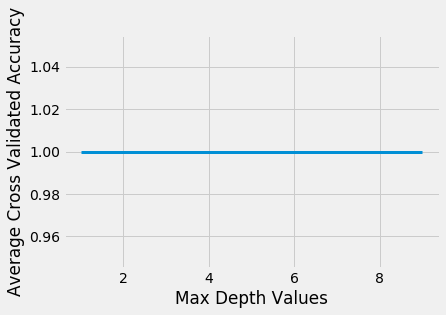

In [531]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

depths = range(1,10)
cv_scores = []

for i in depths:
    cv = cross_val_score(DecisionTreeClassifier(max_depth = i), X, y, cv = 5, scoring = "accuracy")
    cv_mean = cv.mean()
    cv_scores.append(cv_mean)
    
plt.plot(depths, cv_scores, linewidth = 3)
plt.xlabel("Max Depth Values")
plt.ylabel("Average Cross Validated Accuracy")


In [532]:
cv_scores

[0.9999517258025585,
 0.9999517258025585,
 0.9999517258025585,
 0.9999517258025585,
 0.9999517258025585,
 0.9999517258025585,
 0.9999517258025585,
 0.9999517258025585,
 0.9999517258025585]

In [336]:
max(cv_scores)

0.9999517258025585

AttributeError: 'list' object has no attribute 'mean'

In [527]:
tree_model = DecisionTreeClassifier(max_depth = 7)

predictions = []


tree_model.fit(X,y)
y_pred = tree_model.predict(X)
y_prob = tree_model.predict_proba(X)

tree_y_prob = y_prob[:,1]

In [350]:

def threshold(probs, thres = 0.5):
    output = np.where(probs >= thres, 1, 0)
    return output

In [351]:
X = df_dummies.drop(['Metgoal'], axis = 1)
y = df_dummies.Metgoal


#tree_data = X
#tree_data ['Target'] = y

profit_scores = []
thresh_scores = []

for i in range(50,95):
    df_dummies['Metgoal'] = threshold(tree_y_prob, thres = i/100.0)
    df_dummies['funds_raised_amount'] = df_dummies.apply(profit_function, axis=1)
    profit_scores.append(df_dummies.Metgoal.sum())
    thresh_scores.append(i/100.0)


# output = zip(profit_scores,thresh_scores)
zip(thresh_scores,profit_scores)

NameError: name 'profit_function' is not defined

In [297]:
>>> from sklearn import tree
>>> clf = tree.DecisionTreeClassifier()
>>> clf = clf.fit(X, y)

In [298]:
clf.predict_proba([[2., 2.]])
array([[ 0.,  1.]])

ValueError: Number of features of the model must match the input. Model n_features is 42 and input n_features is 2 

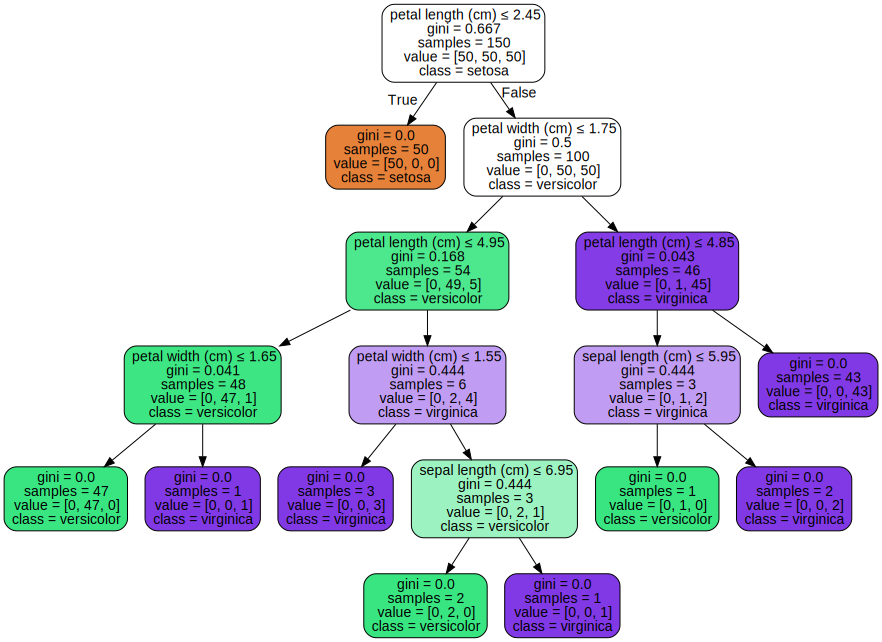

In [301]:
>>> from sklearn.datasets import load_iris
>>> from sklearn import tree
>>> iris = load_iris()
>>> clf = tree.DecisionTreeClassifier()
>>> clf = clf.fit(iris.data, iris.target)

import graphviz 
>>> dot_data = tree.export_graphviz(clf, out_file=None) 
>>> graph = graphviz.Source(dot_data) 
>>> graph.render("iris")

>>> dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
>>> graph = graphviz.Source(dot_data)  
>>> graph 

In [345]:
df_dummies.columns

Index([u'close_date', u'currency', u'funds_raised_amount',
       u'funds_raised_percent', u'is_pre_launch', u'offered_by', u'open_date',
       u'price_offered', u'price_retail', u'product_id', u'product_stage',
       u'project_type', u'Metgoal', u'category_Animal Rights', u'category_Art',
       u'category_Audio', u'category_Camera Gear', u'category_Comics',
       u'category_Culture', u'category_Dance & Theater', u'category_Education',
       u'category_Energy & Green Tech', u'category_Environment',
       u'category_Fashion & Wearables', u'category_Film',
       u'category_Food & Beverages', u'category_Health & Fitness',
       u'category_Home', u'category_Human Rights',
       u'category_Local Businesses', u'category_Music',
       u'category_Phones & Accessories', u'category_Photography',
       u'category_Podcasts, Blogs & Vlogs', u'category_Productivity',
       u'category_Spirituality', u'category_Tabletop Games',
       u'category_Transportation', u'category_Travel & Outdoor

# AdaBoost

In [529]:
from sklearn.ensemble import AdaBoostClassifier

sample_df = {"_amnt": [1000, 500, 200, 5000, 3000, 6000],
            "int_rate": [18, 20, 4, 5, 2, 10], 
            "target": [0, 1, 0, 1, 0, 1]}


profit_df = pd.DataFrame(sample_df)

profit_df

ada_data = X
ada_data['target'] = y
ada_data['predicted'] = threshold(ada_y_prob, thres = .51)

ada_data['profit'] = ada_data.apply(profit_function, axis=1)

ada_data.profit.sum()

NameError: name 'profit_function' is not defined

Text(0.5,1,u'ada boost')

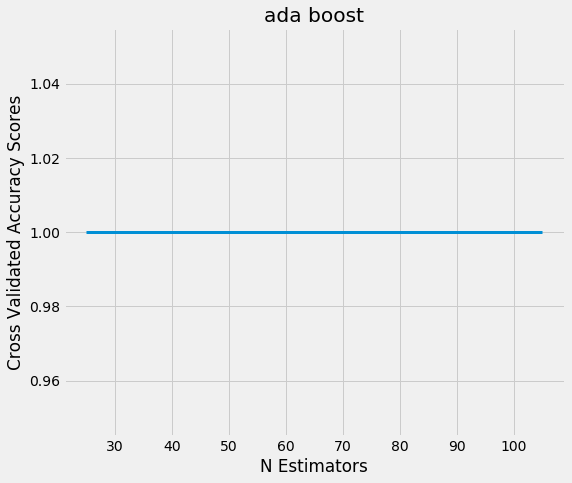

In [303]:


plt.figure(figsize= (8, 7))
plt.plot(estimators, cv_scores, linewidth = 3)
plt.xlabel("N Estimators")
plt.ylabel("Cross Validated Accuracy Scores")
plt.title("ada boost")



In [304]:


ada_model = AdaBoostClassifier(n_estimators=45)

predictions = []


ada_model.fit(X,y)
y_pred = ada_model.predict(X)
y_prob = ada_model.predict_proba(X)

ada_y_prob = y_prob[:,1]



In [305]:


y_pred = ada_model.predict(X)
y_prob = ada_model.predict_proba(X)

ada_y_prob = y_prob[:,1]



In [397]:
df_dummies.head()

,close_date,currency,funds_raised_amount,funds_raised_percent,is_pre_launch,offered_by,open_date,price_offered,price_retail,product_id,...,open_month_4,open_month_5,open_month_6,open_month_7,open_month_8,open_month_9,open_month_10,open_month_11,open_month_12,predicted
0,777,4,4643.0,0.211045,1,0,4821,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,867,4,1801.0,1.000556,1,0,6845,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,947,4,3020.0,0.262609,1,0,7942,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1313,4,35711.0,8.927750,1,0,12526,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,707,4,3100.0,1.033333,1,0,4409,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Decision Tree Classifer Model.feature_importances_ 

In [530]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

model = DecisionTreeClassifier(max_depth = 5)

X = df_dummies.drop(['Metgoal'], axis = 1)
y = df_dummies.Metgoal


model.fit(X, y)

feature_importances_ = model.feature_importances_

# Build a classification task using 10 informative features <-- this is for fake data
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, n_repeated=0, n_classes=2,  random_state=0, shuffle=False)

# Build a forest and compute the feature importances
#forest = ExtraTreesClassifier(n_estimators=250, random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

#for f in range(X.columns[1]): print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

zip(X.columns, feature_importances_) #to combine features & columns names

# Plot the feature importances of the forest



Feature ranking:


[('close_date', 0.0),
 ('currency', 0.0),
 ('funds_raised_amount', 0.0),
 ('funds_raised_percent', 1.0),
 ('is_indemand', 0.0),
 ('is_pre_launch', 0.0),
 ('offered_by', 0.0),
 ('open_date', 0.0),
 ('price_offered', 0.0),
 ('price_retail', 0.0),
 ('product_id', 0.0),
 ('product_stage', 0.0),
 ('project_type', 0.0),
 ('tagline', 0.0),
 ('title', 0.0),
 ('category_Animal Rights', 0.0),
 ('category_Art', 0.0),
 ('category_Audio', 0.0),
 ('category_Camera Gear', 0.0),
 ('category_Comics', 0.0),
 ('category_Culture', 0.0),
 ('category_Dance & Theater', 0.0),
 ('category_Education', 0.0),
 ('category_Energy & Green Tech', 0.0),
 ('category_Environment', 0.0),
 ('category_Fashion & Wearables', 0.0),
 ('category_Film', 0.0),
 ('category_Food & Beverages', 0.0),
 ('category_Health & Fitness', 0.0),
 ('category_Home', 0.0),
 ('category_Human Rights', 0.0),
 ('category_Local Businesses', 0.0),
 ('category_Music', 0.0),
 ('category_Phones & Accessories', 0.0),
 ('category_Photography', 0.0),
 ('cat

# because fundraised amounts are tied to Metgoal its outranked all other features; need to drop fundrasied amounts and rerun model

In [421]:
df_dummies.drop(['funds_raised_percent'], axis = 1, inplace = True)


In [423]:
df_dummies.drop(['funds_raised_amount'], axis = 1, inplace = True)

In [425]:
df_dummies.drop(['predicted'], axis = 1, inplace = True)

In [444]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

model = DecisionTreeClassifier(max_depth = 5)

X = df_dummies.drop(['Metgoal'], axis = 1)
y = df_dummies.Metgoal


model.fit(X, y)

feat_imp = model.feature_importances_

# Build a classification task using 10 informative features <-- this is for fake data
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, n_repeated=0, n_classes=2,  random_state=0, shuffle=False)

# Build a forest and compute the feature importances
#forest = ExtraTreesClassifier(n_estimators=250, random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

#for f in range(X.columns[1]): print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

zip(X.columns,  feat_imp) #to combine features & columns names


Feature ranking:


[('close_date', 0.15686569164493544),
 ('currency', 0.0009587684838241054),
 ('is_pre_launch', 0.00972769076234952),
 ('offered_by', 0.0),
 ('open_date', 0.06929756694809802),
 ('price_offered', 0.0),
 ('price_retail', 0.0),
 ('product_id', 0.0),
 ('product_stage', 0.6167283055695938),
 ('project_type', 0.0),
 ('category_Animal Rights', 0.0),
 ('category_Art', 0.0),
 ('category_Audio', 0.000543980378762358),
 ('category_Camera Gear', 0.0),
 ('category_Comics', 0.0),
 ('category_Culture', 0.0),
 ('category_Dance & Theater', 0.0),
 ('category_Education', 0.0),
 ('category_Energy & Green Tech', 0.010791098213631837),
 ('category_Environment', 0.0),
 ('category_Fashion & Wearables', 0.0),
 ('category_Film', 0.0),
 ('category_Food & Beverages', 0.021473994324428477),
 ('category_Health & Fitness', 0.0),
 ('category_Home', 0.011324122330000519),
 ('category_Human Rights', 0.0),
 ('category_Local Businesses', 0.0),
 ('category_Music', 0.0),
 ('category_Phones & Accessories', 0.0),
 ('category

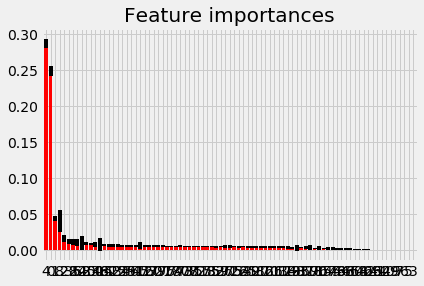

In [441]:

# Plot the feature importances of the forest

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [450]:
print("Feature ranking:")
sorted(zip(X.columns, feat_imp), key =lambda x:x[1], reverse=True)

Feature ranking:


[('product_stage', 0.6167283055695938),
 ('close_date', 0.15686569164493544),
 ('open_date', 0.06929756694809802),
 ('close_year_2016', 0.060978461281746624),
 ('category_Tabletop Games', 0.026039269842909656),
 ('category_Food & Beverages', 0.021473994324428477),
 ('category_Transportation', 0.012338677782341583),
 ('category_Home', 0.011324122330000519),
 ('category_Energy & Green Tech', 0.010791098213631837),
 ('is_pre_launch', 0.00972769076234952),
 ('open_month_6', 0.0019563535054548525),
 ('category_Writing & Publishing', 0.0009760189319233112),
 ('currency', 0.0009587684838241054),
 ('category_Audio', 0.000543980378762358),
 ('offered_by', 0.0),
 ('price_offered', 0.0),
 ('price_retail', 0.0),
 ('product_id', 0.0),
 ('project_type', 0.0),
 ('category_Animal Rights', 0.0),
 ('category_Art', 0.0),
 ('category_Camera Gear', 0.0),
 ('category_Comics', 0.0),
 ('category_Culture', 0.0),
 ('category_Dance & Theater', 0.0),
 ('category_Education', 0.0),
 ('category_Environment', 0.0),
 

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [394]:
df_dummies.columns


Index([u'close_date', u'currency', u'funds_raised_amount',
       u'funds_raised_percent', u'is_pre_launch', u'offered_by', u'open_date',
       u'price_offered', u'price_retail', u'product_id', u'product_stage',
       u'project_type', u'Metgoal', u'category_Animal Rights', u'category_Art',
       u'category_Audio', u'category_Camera Gear', u'category_Comics',
       u'category_Culture', u'category_Dance & Theater', u'category_Education',
       u'category_Energy & Green Tech', u'category_Environment',
       u'category_Fashion & Wearables', u'category_Film',
       u'category_Food & Beverages', u'category_Health & Fitness',
       u'category_Home', u'category_Human Rights',
       u'category_Local Businesses', u'category_Music',
       u'category_Phones & Accessories', u'category_Photography',
       u'category_Podcasts, Blogs & Vlogs', u'category_Productivity',
       u'category_Spirituality', u'category_Tabletop Games',
       u'category_Transportation', u'category_Travel & Outdoor

In [384]:
df_dummies.head() 

,close_date,currency,funds_raised_amount,funds_raised_percent,is_pre_launch,offered_by,open_date,price_offered,price_retail,product_id,...,open_month_4,open_month_5,open_month_6,open_month_7,open_month_8,open_month_9,open_month_10,open_month_11,open_month_12,predicted
0,777,4,4643.0,0.211045,1,0,4821,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,867,4,1801.0,1.000556,1,0,6845,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,947,4,3020.0,0.262609,1,0,7942,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1313,4,35711.0,8.927750,1,0,12526,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,707,4,3100.0,1.033333,1,0,4409,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [360]:
>>> from sklearn.ensemble import RandomForestClassifier
>>> from sklearn.datasets import make_classification
>>>
X = df_dummies.drop(['Metgoal'], axis = 1)
y = df_dummies.Metgoal

>>> X, y = make_classification(n_samples=1000, n_features=4,
...                            n_informative=2, n_redundant=0,
...                            random_state=0, shuffle=False)
>>> clf = RandomForestClassifier(max_depth=2, random_state=0)
>>> clf.fit(X, y)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


Feature ranking:
1. feature 0 (0.118257)
2. feature 7 (0.111060)
3. feature 8 (0.107380)
4. feature 5 (0.105411)
